# Keras ResNet classifier for CIFAR10 test
ResNet network for CIFAR10 network test

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from data_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import tensorflow as tf 
from keras import backend as k
import os
config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.1
config.gpu_options.allow_growth = True
k.tensorflow_backend.set_session(tf.Session(config=config))

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# get data
cifar10_data = CIFAR10Data()
x_train, y_train, x_test, y_test = cifar10_data.get_data(subtract_mean=True)

num_train = int(x_train.shape[0] * 0.9)
num_val = x_train.shape[0] - num_train
mask = list(range(num_train, num_train+num_val))
x_val = x_train[mask]
y_val = y_train[mask]

mask = list(range(num_train))
x_train = x_train[mask]
y_train = y_train[mask]

print('num train:%d num val:%d' % (num_train, num_val))
data = (x_train, y_train, x_val, y_val, x_test, y_test)

CIFAR10 Training data shape: (50000, 32, 32, 3)
CIFAR10 Training label shape (50000, 1)
CIFAR10 Test data shape (10000, 32, 32, 3)
CIFAR10 Test label shape (10000, 1)
num train:45000 num val:5000


## test with resnet20
resnet20 is inffered in the ResNet paper.

In [23]:
from classifiers.ResNet import ResNet20ForCIFAR10
from keras import losses
from keras import optimizers

weight_decay = 1e-4
lr = 1e-1
num_classes = 10
resnet20 = ResNet20ForCIFAR10(input_shape=(32, 32, 3), classes=num_classes, weight_decay=weight_decay)
opt = optimizers.SGD(lr=lr, momentum=0.9, nesterov=False)
resnet20.compile(optimizer=opt,
                 loss=losses.categorical_crossentropy,
                 metrics=['accuracy'])
resnet20.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_85 (Conv2D)              (None, 32, 32, 16)   432         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_85 (BatchNo (None, 32, 32, 16)   48          conv2d_85[0][0]                  
__________________________________________________________________________________________________
activation_85 (Activation)      (None, 32, 32, 16)   0           batch_normalization_85[0][0]     
__________________________________________________________________________________________________
conv2d_86 

In [24]:
%%time
from cifar10_solver import *
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch):
    new_lr = lr
    if epoch <= 91:
        pass
    elif epoch > 91 and epoch <= 137:
        new_lr = lr * 0.1
    else:
        new_lr = lr * 0.01
    print('new lr:%.2e' % new_lr)
    return new_lr 

reduce_lr = LearningRateScheduler(lr_scheduler)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=10, min_lr=1e-6, verbose=1)

solver = CIFAR10Solver(resnet20, data)
history = solver.train(epochs=182, batch_size=128, data_augmentation=True, callbacks=[reduce_lr])

train with data augmentation
Epoch 1/182
new lr:1.00e-01
352/352 [==============================] - 34s 97ms/step - loss: 1.7456 - acc: 0.3817 - val_loss: 2.7989 - val_acc: 0.2484
Epoch 2/182
new lr:1.00e-01
352/352 [==============================] - 26s 73ms/step - loss: 1.2908 - acc: 0.5639 - val_loss: 1.8602 - val_acc: 0.4428
Epoch 3/182
new lr:1.00e-01
352/352 [==============================] - 27s 78ms/step - loss: 1.0621 - acc: 0.6598 - val_loss: 1.7012 - val_acc: 0.5116
Epoch 4/182
new lr:1.00e-01
352/352 [==============================] - 29s 81ms/step - loss: 0.9339 - acc: 0.7111 - val_loss: 1.2129 - val_acc: 0.6356
Epoch 5/182
new lr:1.00e-01
352/352 [==============================] - 29s 82ms/step - loss: 0.8530 - acc: 0.7422 - val_loss: 1.4731 - val_acc: 0.5908
Epoch 6/182
new lr:1.00e-01
352/352 [==============================] - 29s 84ms/step - loss: 0.8178 - acc: 0.7591 - val_loss: 1.5080 - val_acc: 0.6254
Epoch 7/182
new lr:1.00e-01
352/352 [============================

Epoch 55/182
new lr:1.00e-01
352/352 [==============================] - 28s 80ms/step - loss: 0.5573 - acc: 0.8815 - val_loss: 0.7307 - val_acc: 0.8336
Epoch 56/182
new lr:1.00e-01
352/352 [==============================] - 27s 75ms/step - loss: 0.5619 - acc: 0.8820 - val_loss: 0.8695 - val_acc: 0.7976
Epoch 57/182
new lr:1.00e-01
352/352 [==============================] - 26s 74ms/step - loss: 0.5679 - acc: 0.8798 - val_loss: 0.9726 - val_acc: 0.7866
Epoch 58/182
new lr:1.00e-01
352/352 [==============================] - 26s 75ms/step - loss: 0.5523 - acc: 0.8840 - val_loss: 0.7595 - val_acc: 0.8144
Epoch 59/182
new lr:1.00e-01
352/352 [==============================] - 26s 75ms/step - loss: 0.5550 - acc: 0.8843 - val_loss: 0.7557 - val_acc: 0.8194
Epoch 60/182
new lr:1.00e-01
352/352 [==============================] - 28s 80ms/step - loss: 0.5506 - acc: 0.8838 - val_loss: 0.7379 - val_acc: 0.8344
Epoch 61/182
new lr:1.00e-01
352/352 [==============================] - 26s 74ms/step - 

352/352 [==============================] - 26s 75ms/step - loss: 0.3121 - acc: 0.9562 - val_loss: 0.5067 - val_acc: 0.8976
Epoch 109/182
new lr:1.00e-02
352/352 [==============================] - 28s 80ms/step - loss: 0.3077 - acc: 0.9573 - val_loss: 0.4682 - val_acc: 0.9060
Epoch 110/182
new lr:1.00e-02
352/352 [==============================] - 28s 78ms/step - loss: 0.3028 - acc: 0.9590 - val_loss: 0.4610 - val_acc: 0.9086
Epoch 111/182
new lr:1.00e-02
352/352 [==============================] - 27s 76ms/step - loss: 0.2971 - acc: 0.9599 - val_loss: 0.4585 - val_acc: 0.9116
Epoch 112/182
new lr:1.00e-02
352/352 [==============================] - 26s 75ms/step - loss: 0.2953 - acc: 0.9591 - val_loss: 0.4522 - val_acc: 0.9136
Epoch 113/182
new lr:1.00e-02
352/352 [==============================] - 29s 84ms/step - loss: 0.2896 - acc: 0.9603 - val_loss: 0.4517 - val_acc: 0.9146
Epoch 114/182
new lr:1.00e-02
352/352 [==============================] - 31s 88ms/step - loss: 0.2886 - acc: 0.9

Epoch 162/182
new lr:1.00e-03
352/352 [==============================] - 27s 77ms/step - loss: 0.1918 - acc: 0.9793 - val_loss: 0.4212 - val_acc: 0.9116
Epoch 163/182
new lr:1.00e-03
352/352 [==============================] - 26s 74ms/step - loss: 0.1894 - acc: 0.9798 - val_loss: 0.4218 - val_acc: 0.9122
Epoch 164/182
new lr:1.00e-03
352/352 [==============================] - 26s 74ms/step - loss: 0.1872 - acc: 0.9811 - val_loss: 0.4267 - val_acc: 0.9150
Epoch 165/182
new lr:1.00e-03
352/352 [==============================] - 27s 76ms/step - loss: 0.1890 - acc: 0.9804 - val_loss: 0.4183 - val_acc: 0.9142
Epoch 166/182
new lr:1.00e-03
352/352 [==============================] - 26s 75ms/step - loss: 0.1858 - acc: 0.9817 - val_loss: 0.4155 - val_acc: 0.9132
Epoch 167/182
new lr:1.00e-03
352/352 [==============================] - 27s 76ms/step - loss: 0.1866 - acc: 0.9815 - val_loss: 0.4181 - val_acc: 0.9114
Epoch 168/182
new lr:1.00e-03
352/352 [==============================] - 26s 74ms/

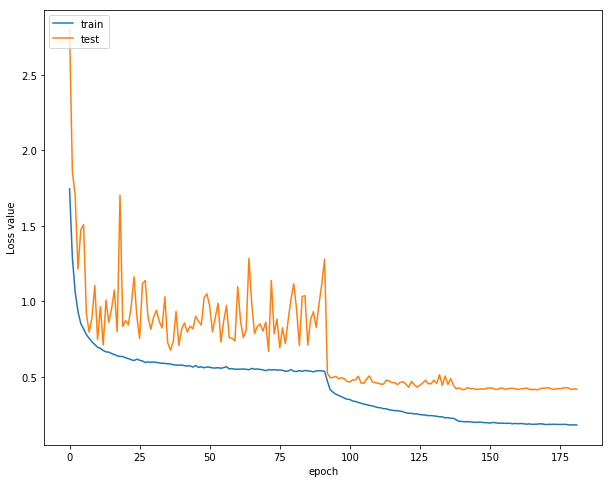

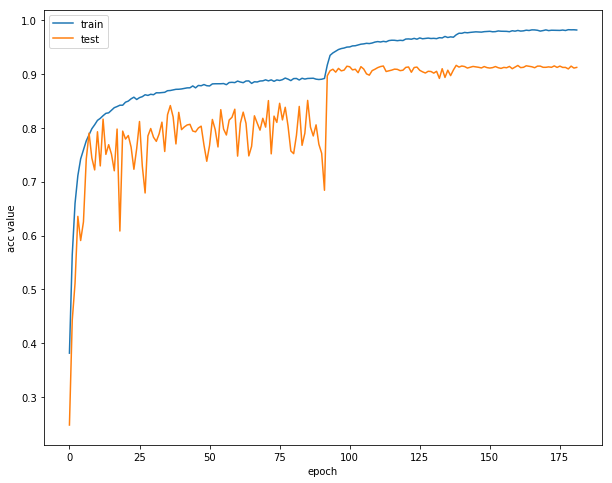

In [25]:
# plot loss and acc 
plot_history(history)

In [26]:
solver.test()

10000/10000 [==============================] - 5s 464us/step
test data loss:0.45 acc:0.9145
